In [ ]:
import folium

# Create a map centered around a point
m = folium.Map(location=[20, 0], zoom_start=4)

# Example list of lat/lng
locations = [
    [37.423021, -122.083739],
    [36.964645, -122.015261]
]

for location in locations:
    folium.Marker(location).add_to(m)

# Save map to an HTML file
m.save("map.html")


In [1]:
import pandas as pd
import numpy as np 


rate_df = pd.read_csv('Restaurants_Seattle.csv')
hour_df = pd.read_csv('Restaurants_Seattle_Hours_with_coordinates.csv')

In [32]:
#merged_df = pd.read_csv('merge.csv')
merged_df = pd.merge(hour_df, rate_df, on='Name')

In [35]:
merged_df 

,Name,Address,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Latitude,Longitude,Star,Stars_count,Price,Area,Category,Services,Searched City
0,The Pink Door,"1919 Post Alley, Seattle, WA 98101","['Closed', '']","['Closed', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']",47.610388,-122.342531,4.5,5473.0,$$,Downtown,"['Italian', 'Wine Bars', 'Seafood']","['Proof of vaccination required', 'Delivery', ...",Seattle
1,The Pink Door,"1919 Post Alley, Seattle, WA 98101","['Closed', '']","['Closed', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']",47.610388,-122.342531,4.5,5474.0,$$,Downtown,"['Italian', 'Wine Bars', 'Seafood']","['Proof of vaccination required', 'Delivery', ...",Bellevue
2,The Pink Door,"1919 Post Alley, Seattle, WA 98101","['Closed', '']","['Closed', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']",47.610388,-122.342531,4.5,5473.0,$$,Downtown,"['Italian', 'Wine Bars', 'Seafood']","['Proof of vaccination required', 'Delivery', ...",Seattle
3,The Pink Door,"1919 Post Alley, Seattle, WA 98101","['Closed', '']","['Closed', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']",47.610388,-122.342531,4.5,5474.0,$$,Downtown,"['Italian', 'Wine Bars', 'Seafood']","['Proof of vaccination required', 'Delivery', ...",Bellevue
4,Nue,"1519 14th Ave, Seattle, WA 98122","['11:00 AM - 10:00 PM', '']","['11:00 AM - 10:00 PM', '']","['11:00 AM - 10:00 PM', '']","['11:00 AM - 10:00 PM', '']","['11:00 AM - 11:00 PM', '']","['10:00 AM - 11:00 PM', '']","['10:00 AM - 10:00 PM', '']",47.614722,-122.314441,4.0,1067.0,$$,Capitol Hill,"['Tapas/Small Plates', 'Cocktail Bars', 'Break...","['Live wait time: 0 mins', 'Outdoor dining', '...",Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,Mariscos Culiacan,"26216 Pacific Hwy S, Kent, WA 98032","['11:00 AM - 10:00 PM', '']","['11:00 AM - 10:00 PM', '']","['11:00 AM - 10:00 PM', '']","['11:00 AM - 10:00 PM', '']","['10:00 AM - 12:00 AM (Next day)', '']","['10:00 AM - 12:00 AM (Next day)', '']","['10:00 AM - 12:00 AM (Next day)', '']",47.366395,-122.303459,2.5,21.0,$$$$,NaN,"['Mexican', 'Seafood']",[],Federal Way
1762,Happy Teriyaki,"4910 Pacific Hwy E, Fife, WA 98424","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['11:00 AM - 9:00 PM', '']","['Closed', '']",47.242994,-122.362646,4.0,167.0,$$,NaN,"['Japanese', 'Chinese', 'Sushi Bars']","['Outdoor dining', 'Delivery', 'Takeout']",Federal Way
1763,Taqueria El Corral,"3251 Pacific Hwy E, Fife, WA 98424","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']",47.243246,-122.386126,4.5,24.0,$,NaN,"['Food Trucks', 'Mexican']",[],Federal Way
1764,Magic Wok Restaurant,"2327 SW 336th St, Federal Way, WA 98023","['11:30 AM - 9:30 PM', '']","['11:30 AM - 9:30 PM', '']","['11:30 AM - 9:30 PM', '']","['11:30 AM - 9:30 PM', '']","['11:30 AM - 10:00 PM', '']","['12:00 PM - 10:00 PM', '']","['4:00 PM - 9:00 PM', '']",47.299814,-122.363624,3.0,96.0,$$,NaN,['Chinese'],"['Delivery', 'Takeout']",Federal Way


In [50]:
merged_df = merged_df.dropna(subset =['Latitude'])

In [51]:
df_filtered = merged_df[merged_df['Stars_count'] > 5]

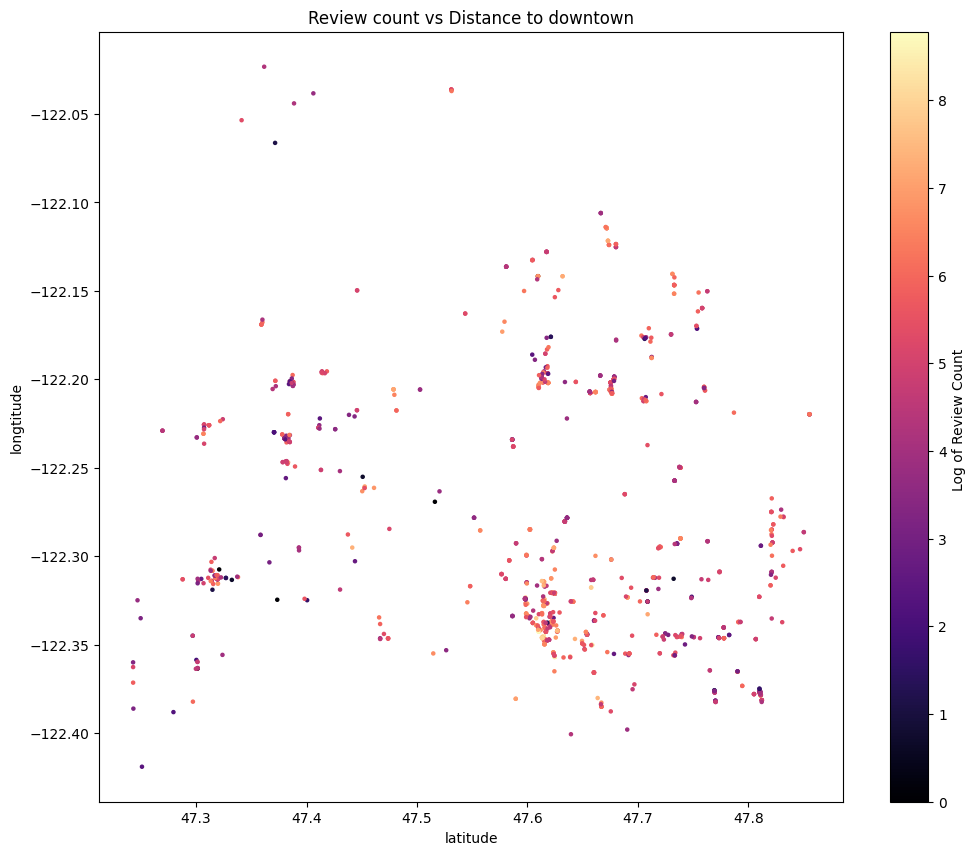

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

plt.ylabel('longtitude')
plt.xlabel('latitude')
plt.title('Review count vs Distance to downtown')

plt.scatter( merged_df['Latitude'], merged_df['Longitude'],  c= np.log(merged_df['Stars_count']), cmap='magma', s=5)

# Add a color bar to show the mapping of values to colors
color_bar = plt.colorbar()
color_bar.set_label('Log of Review Count ')


plt.show()

In [ ]:
import folium

# Create a map centered around a point
m = folium.Map(location=[20, 0], zoom_start=4)

# Example list of lat/lng
locations = [
    [37.423021, -122.083739],
    [36.964645, -122.015261]
]

for location in locations:
    folium.Marker(location).add_to(m)

# Save map to an HTML file
m.save("map.html")


In [ ]:
for _, row in df.iterrows():
    color = get_marker_color(row['star_count'])
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        icon=folium.Icon(color=color)
    ).add_to(m)

In [29]:
merged_df 

,Unnamed: 0,Name,Address,Mon,Tue,Wed,Thu,Fri,Sat,Sun,latitude,longitude,Star,Stars_count,Price,Area,Category,Services,Searched City
0,0,The Pink Door,"1919 Post Alley, Seattle, WA 98101","['Closed', '']","['Closed', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']",47.301432,-122.362506,4.5,5473.0,$$,Downtown,"['Italian', 'Wine Bars', 'Seafood']","['Proof of vaccination required', 'Delivery', ...",Seattle
1,1,The Pink Door,"1919 Post Alley, Seattle, WA 98101","['Closed', '']","['Closed', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 3:30 PM, 5:00 PM - 10:00 PM', '']",47.301432,-122.362506,4.5,5474.0,$$,Downtown,"['Italian', 'Wine Bars', 'Seafood']","['Proof of vaccination required', 'Delivery', ...",Bellevue
2,2,The Pink Door,"1919 Post Alley, Seattle, WA 98101","['Closed', '']","['Closed', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']",47.301432,-122.362506,4.5,5473.0,$$,Downtown,"['Italian', 'Wine Bars', 'Seafood']","['Proof of vaccination required', 'Delivery', ...",Seattle
3,3,The Pink Door,"1919 Post Alley, Seattle, WA 98101","['Closed', '']","['Closed', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']","['11:30 AM - 4:30 PM, 5:00 PM - 10:00 PM', '']",47.301432,-122.362506,4.5,5474.0,$$,Downtown,"['Italian', 'Wine Bars', 'Seafood']","['Proof of vaccination required', 'Delivery', ...",Bellevue
4,4,Nue,"1519 14th Ave, Seattle, WA 98122","['11:00 AM - 10:00 PM', '']","['11:00 AM - 10:00 PM', '']","['11:00 AM - 10:00 PM', '']","['11:00 AM - 10:00 PM', '']","['11:00 AM - 11:00 PM', '']","['10:00 AM - 11:00 PM', '']","['10:00 AM - 10:00 PM', '']",47.301432,-122.362506,4.0,1067.0,$$,Capitol Hill,"['Tapas/Small Plates', 'Cocktail Bars', 'Break...","['Live wait time: 0 mins', 'Outdoor dining', '...",Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,1761,Mariscos Culiacan,"26216 Pacific Hwy S, Kent, WA 98032","['11:00 AM - 10:00 PM', '']","['11:00 AM - 10:00 PM', '']","['11:00 AM - 10:00 PM', '']","['11:00 AM - 10:00 PM', '']","['10:00 AM - 12:00 AM (Next day)', '']","['10:00 AM - 12:00 AM (Next day)', '']","['10:00 AM - 12:00 AM (Next day)', '']",47.301432,-122.362506,2.5,21.0,$$$$,NaN,"['Mexican', 'Seafood']",[],Federal Way
1762,1762,Happy Teriyaki,"4910 Pacific Hwy E, Fife, WA 98424","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['11:00 AM - 9:00 PM', '']","['Closed', '']",47.301432,-122.362506,4.0,167.0,$$,NaN,"['Japanese', 'Chinese', 'Sushi Bars']","['Outdoor dining', 'Delivery', 'Takeout']",Federal Way
1763,1763,Taqueria El Corral,"3251 Pacific Hwy E, Fife, WA 98424","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']","['10:00 AM - 9:00 PM', '']",47.301432,-122.362506,4.5,24.0,$,NaN,"['Food Trucks', 'Mexican']",[],Federal Way
1764,1764,Magic Wok Restaurant,"2327 SW 336th St, Federal Way, WA 98023","['11:30 AM - 9:30 PM', '']","['11:30 AM - 9:30 PM', '']","['11:30 AM - 9:30 PM', '']","['11:30 AM - 9:30 PM', '']","['11:30 AM - 10:00 PM', '']","['12:00 PM - 10:00 PM', '']","['4:00 PM - 9:00 PM', '']",47.301432,-122.362506,3.0,96.0,$$,NaN,['Chinese'],"['Deliver

In [31]:
hour_df['Latitude'].isna().sum()

385

In [76]:
def get_marker_color(star_count):
    if star_count < 3:
        return 'lightblue'
    if star_count < 5:
        return 'blue'
    elif star_count < 7:
        return 'orange'
    elif star_count < 8:
        return 'red'
    else:
        return 'darkred'

In [85]:
import pandas as pd
import folium
import branca
import numpy as np

#47.6050° N, 122.3344° W
# Create a map centered around a point
m = folium.Map(location=[47.6050, -122.3344], zoom_start=10)

# Apply a logarithmic transformation to the star_count values
df_filtered['log_star_count'] = np.log(df_filtered['Stars_count'])

transitions = [0, 1, 2]
colors = ["blue", "red"]

colormap = branca.colormap.LinearColormap(colors, 
                                          index=transitions, 
                                          caption='Logarithmic Star Count',
                                          )

m.add_child(colormap)

# Iterate over DataFrame and add markers to the map
for _, row in df_filtered.iterrows():
    color = get_marker_color(row['log_star_count'])
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.Icon(color=color, icon='star'),  # Using a 'star' icon for illustration
        popup=f"Star Count: {row['Stars_count']}"  # Display original star_count on popup
    ).add_to(m)

# Save map to an HTML file
m.save("map.html")


/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_68118/1024313671.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['log_star_count'] = np.log(df_filtered['Stars_count'])
/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_68118/1024313671.py:28: UserWarning: color argument of Icon should be one of: {'darkred', 'pink', 'blue', 'white', 'purple', 'red', 'darkgreen', 'black', 'lightgreen', 'lightblue', 'lightred', 'cadetblue', 'darkpurple', 'green', 'gray', 'darkblue', 'beige', 'lightgray', 'orange'}.
  icon=folium.Icon(color=color, icon='star'),  # Using a 'star' icon for illustration


In [71]:
np.max( np.log(df_filtered['Stars_count']))

8.781094735202615

In [80]:
transitions = [0, 3, 5, 6, 7, 8, 9]
colors = ["lightblue", "blue", "yellow", "orange", "red", "darkred"]
assert len(transitions) == len(colors) + 1, "Mismatch between colors and transitions lengths."


In [87]:
#47.6050° N, 122.3344° W
merged_df['distance'] = np.sqrt((merged_df['Latitude'] -  47.6050)** 2 + (merged_df['Longitude'] + 122.3344) ** 2) * 111

/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_68118/2087555865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['distance'] = np.sqrt((merged_df['Latitude'] -  47.6050)** 2 + (merged_df['Longitude'] + 122.3344) ** 2) * 111


0        1.082700
1        1.082700
2        1.082700
3        1.082700
4        2.464317
          ...    
1761    26.706859
1762    40.304796
1763    40.563141
1764    34.030584
1765    31.672094
Name: distance, Length: 1155, dtype: float64

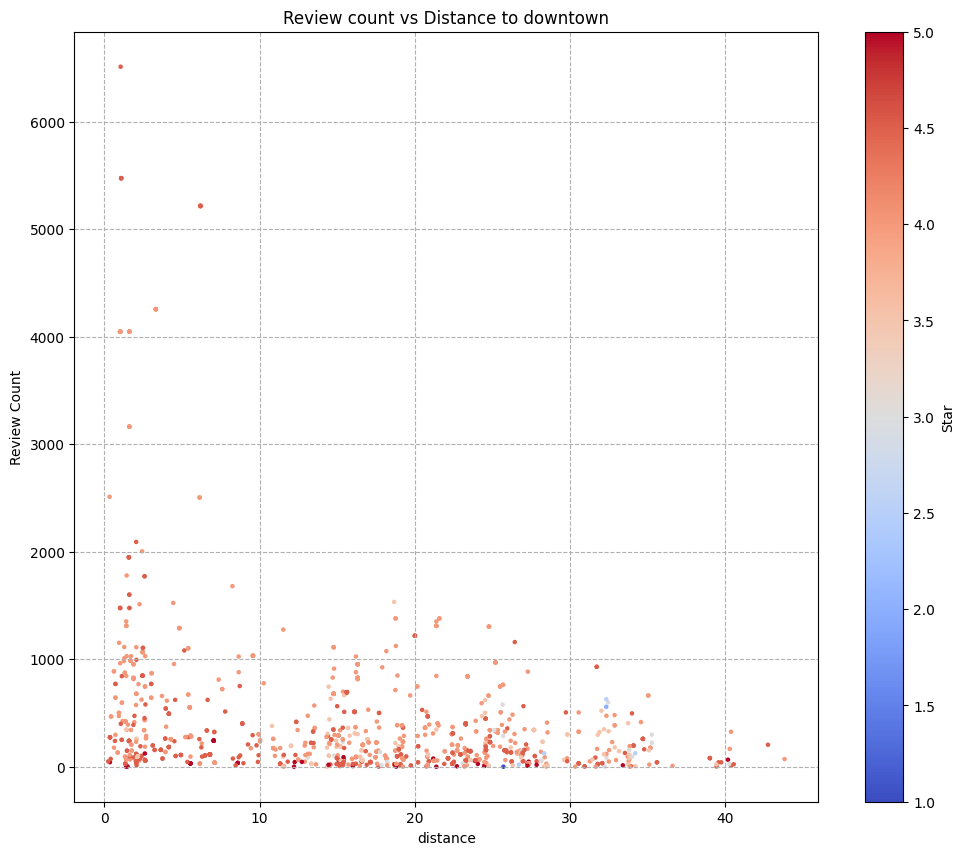

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

plt.xlabel('distance')
plt.ylabel('Review Count')
plt.title('Review count vs Distance to downtown')
plt.grid(True, linestyle='--')

plt.scatter(merged_df['distance'], merged_df['Stars_count'],  c=  merged_df['Star'], cmap='coolwarm', s=5,facecolor='E1E1E1')

# Add a color bar to show the mapping of values to colors
color_bar = plt.colorbar()
color_bar.set_label('Star')


plt.show()

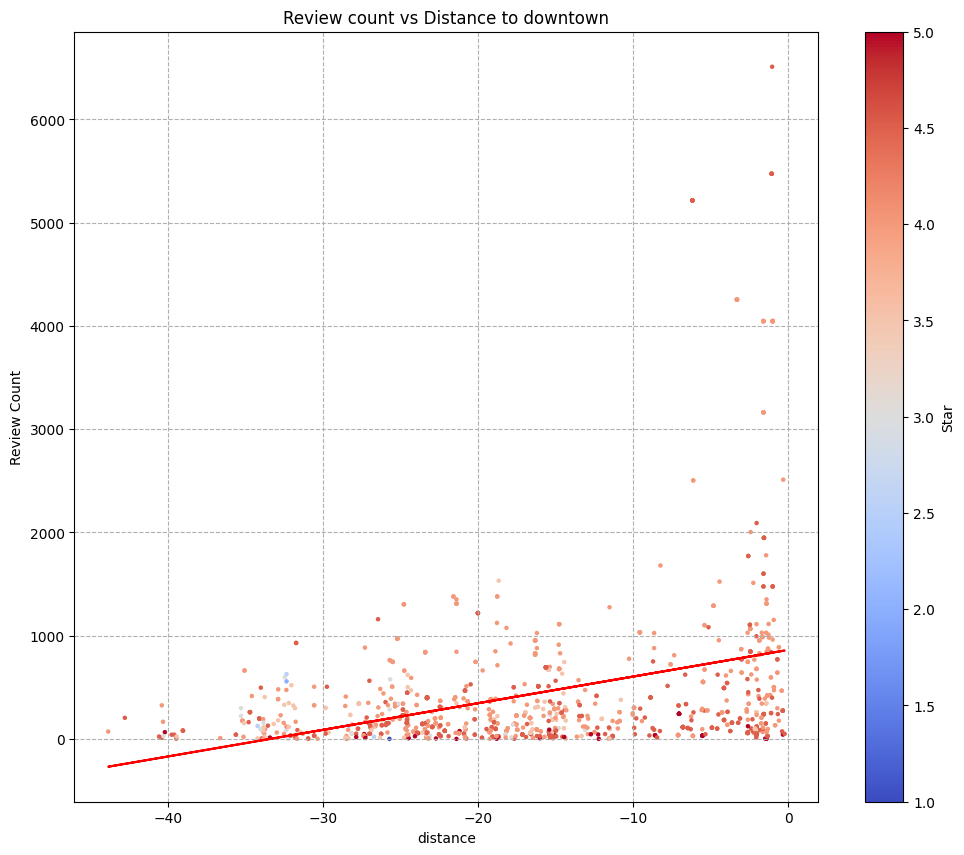

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

plt.xlabel('distance')
plt.ylabel('Review Count')
plt.title('Review count vs Distance to downtown')
plt.grid(True, linestyle='--')

X = -1 * merged_df['distance']
Y = merged_df['Stars_count']

m, b = np.polyfit(X, Y, 1)

plt.plot(X, m*X + b, color='red', label=f'Linear Fit: y = {m:.2f}x + {b:.2f}')
plt.scatter(-1 * merged_df['distance'], merged_df['Stars_count'],  c=  merged_df['Star'], cmap='coolwarm', s=5,facecolor='E1E1E1')

# Add a color bar to show the mapping of values to colors
color_bar = plt.colorbar()
color_bar.set_label('Star')


plt.show()

In [103]:
correlation_matrix = np.corrcoef(merged_df['distance'], merged_df['Stars_count'])
correlation_matrix[0,1]

-0.3259623015223957

In [104]:
correlation_matrix = np.corrcoef(merged_df['distance'], merged_df['Star'])
correlation_matrix[0,1]

-0.17048712883285433

In [105]:
correlation_matrix = np.corrcoef( 644/ merged_df['distance'], merged_df['Stars_count'])
correlation_matrix[0,1]

0.2793590110517335

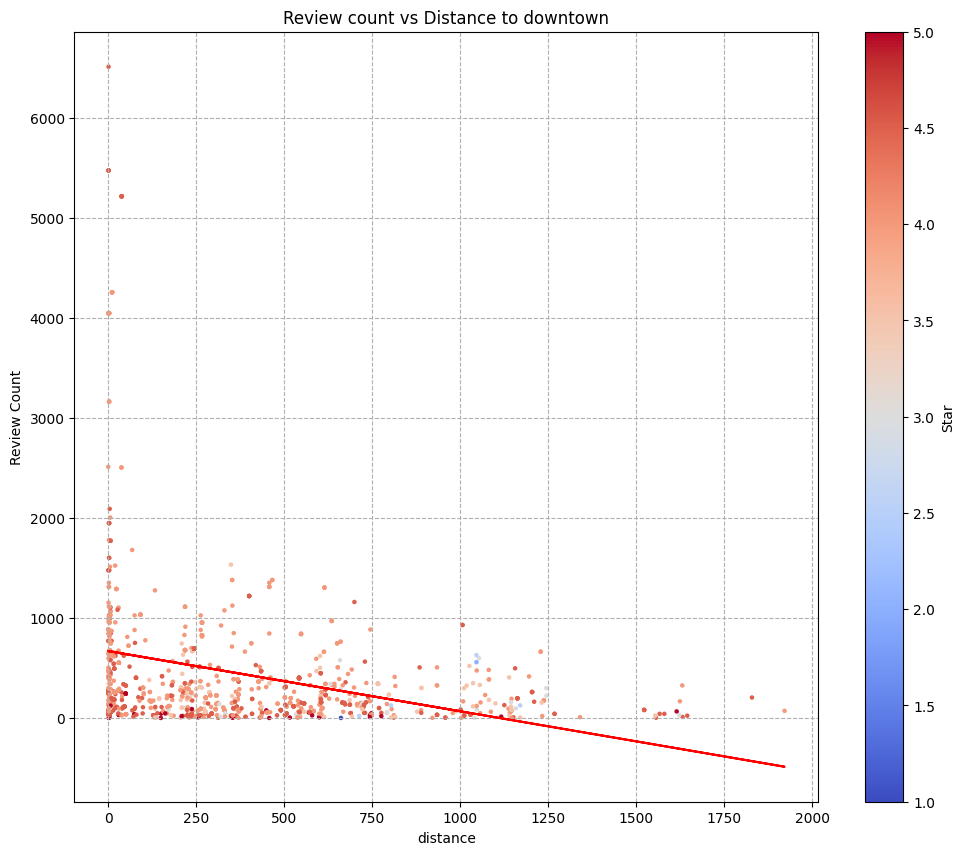

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

plt.xlabel('distance')
plt.ylabel('Review Count')
plt.title('Review count vs Distance to downtown')
plt.grid(True, linestyle='--')

X = merged_df['distance'] ** 2
Y = merged_df['Stars_count']

m, b = np.polyfit(X, Y, 1)

plt.plot(X, m*X + b, color='red', label=f'Linear Fit: y = {m:.2f}x + {b:.2f}')
plt.scatter(X, Y,  c=  merged_df['Star'], cmap='coolwarm', s=5,facecolor='E1E1E1')

# Add a color bar to show the mapping of values to colors
color_bar = plt.colorbar()
color_bar.set_label('Star')


plt.show()

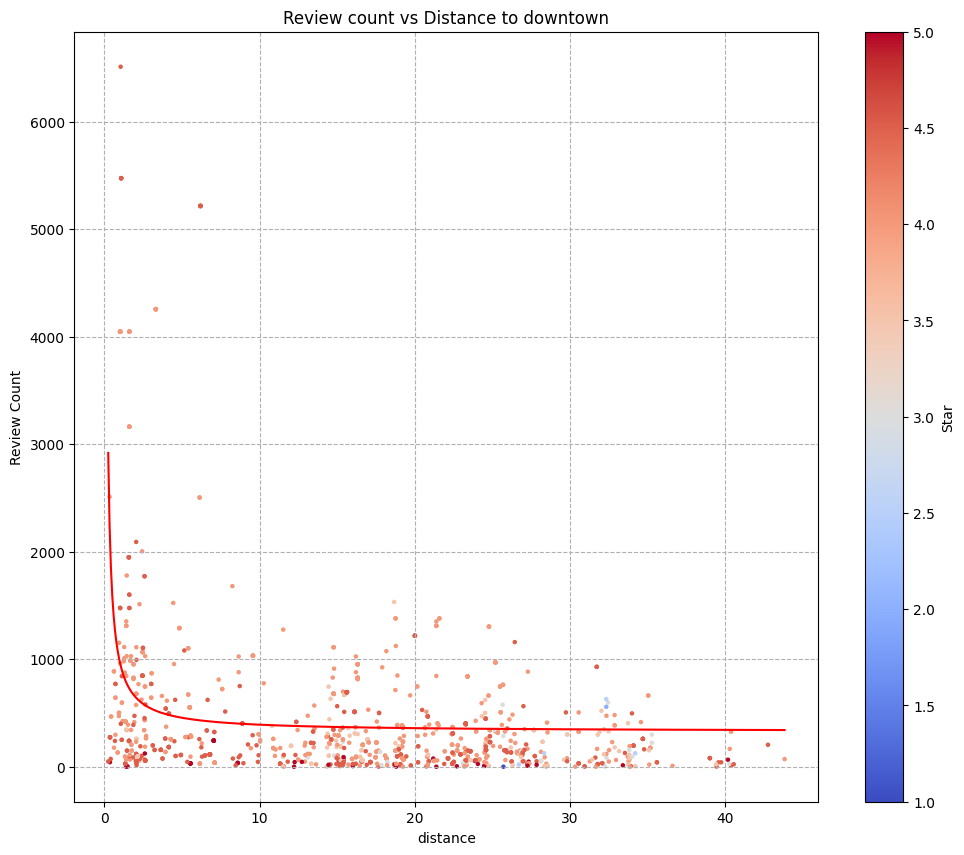

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

plt.xlabel('distance')
plt.ylabel('Review Count')
plt.title('Review count vs Distance to downtown')
plt.grid(True, linestyle='--')

X = merged_df['distance']
Y = merged_df['Stars_count']
Z = 1 / X

a, b = np.polyfit(Z, Y, 1)


# Plot the inverse relationship fit
X_smooth = np.linspace(X.min(), X.max(), 500)
Y_smooth = a / X_smooth + b
plt.plot(X_smooth, Y_smooth, color='red', label=f'Inverse Fit: y = {a:.2f}/x + {b:.2f}')



plt.scatter(X, Y,  c=  merged_df['Star'], cmap='coolwarm', s=5,facecolor='E1E1E1')

# Add a color bar to show the mapping of values to colors
color_bar = plt.colorbar()
color_bar.set_label('Star')


plt.show()

In [115]:
correlation_matrix = np.corrcoef( a/merged_df['distance'] + b, merged_df['Stars_count'])
correlation_matrix[0,1]

0.27935901105173344

In [114]:
def compute_r_squared(observed, predicted):
    """Compute the R^2 value."""
    y_bar = np.mean(observed)
    ss_tot = np.sum((observed - y_bar)**2)
    ss_res = np.sum((observed - predicted)**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# Using the previous data and fit:
predicted_Y = a / X + b
r_squared = compute_r_squared(Y, predicted_Y)

print(f"The R^2 value for the fit is: {r_squared:.2f}")

The R^2 value for the fit is: 0.08


In [ ]:
latitude	longitude

In [124]:
# Given coordinates
latitudes = [47.609478, 47.663277, 47.61526580730773, 47.315898]
longitudes = [-122.337596, -122.313113, -122.20426428866053, -122.312828]

# Create a new column with a high initial value
df_filtered['best_distance'] = 10000

# Iterate over each row
for index, row in df_filtered.iterrows():
    min_distance = 10000
    for i in range(4):
        row_distance = np.sqrt((row['Latitude'] - latitudes[i]) ** 2 + (row['Longitude'] - longitudes[i]) ** 2) * 111
        min_distance = min(row_distance, min_distance)
    df_filtered.at[index, 'best_distance'] = min_distance



/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_68118/578241022.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['best_distance'] = 10000
/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_68118/578241022.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5570319016367135' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_filtered.at[index, 'best_distance'] = min_distance


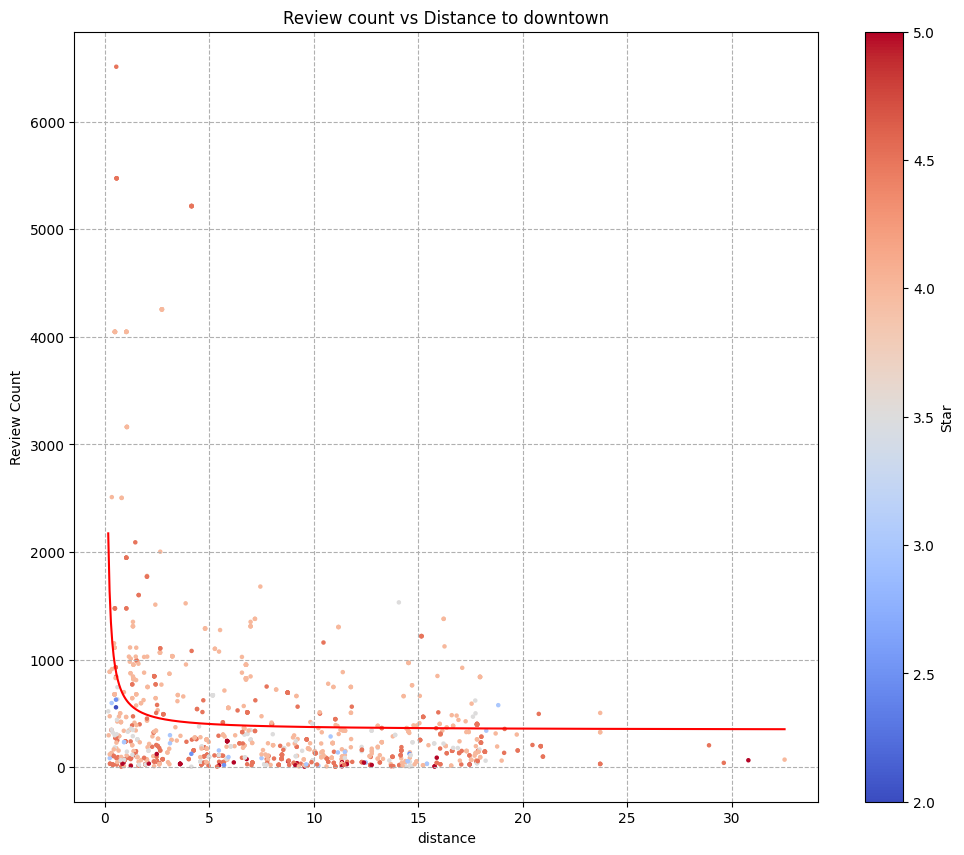

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

plt.xlabel('distance')
plt.ylabel('Review Count')
plt.title('Review count vs Distance to downtown')
plt.grid(True, linestyle='--')

X = df_filtered['best_distance']
Y = df_filtered['Stars_count']
Z = 1 / X

a, b = np.polyfit(Z, Y, 1)


# Plot the inverse relationship fit
X_smooth = np.linspace(X.min(), X.max(), 500)
Y_smooth = a / X_smooth + b
plt.plot(X_smooth, Y_smooth, color='red', label=f'Inverse Fit: y = {a:.2f}/x + {b:.2f}')



plt.scatter(X, Y,  c=  df_filtered['Star'], cmap='coolwarm', s=5,facecolor='E1E1E1')

# Add a color bar to show the mapping of values to colors
color_bar = plt.colorbar()
color_bar.set_label('Star')


plt.show()

In [125]:
df_filtered['best_distance']

0        0.557032
1        0.557032
2        0.557032
3        0.557032
4        2.635304
          ...    
1759     9.280371
1761     5.700863
1762     9.801239
1763    11.455563
1764     5.914261
Name: best_distance, Length: 1129, dtype: float64

In [129]:
correlation_matrix = np.corrcoef( a/df_filtered['best_distance'] + b,df_filtered['Stars_count'])
correlation_matrix[0,1]

0.24043713649423618